In [ ]:
# numerical operations and data preprocessing
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#to build neural network sequential model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

#scaling,encoding
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder

#train_test_split
from sklearn.model_selection import train_test_split

# classification evaluation metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Import dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/AI-ML-DL/Churn_Modelling_DL.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


EDA

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


data preprocessing

In [ ]:
# label encoding
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Geography']=le.fit_transform(df['Geography'])

In [ ]:
# splitting data
x=df.drop(columns=['Exited'])
y=df['Exited']

In [ ]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


<Axes: xlabel='Exited', ylabel='count'>

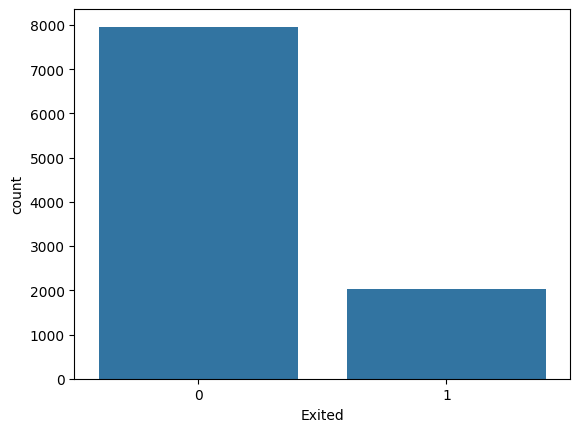

In [ ]:
sns.countplot(x=df['Exited'])

<Axes: xlabel='Geography', ylabel='count'>

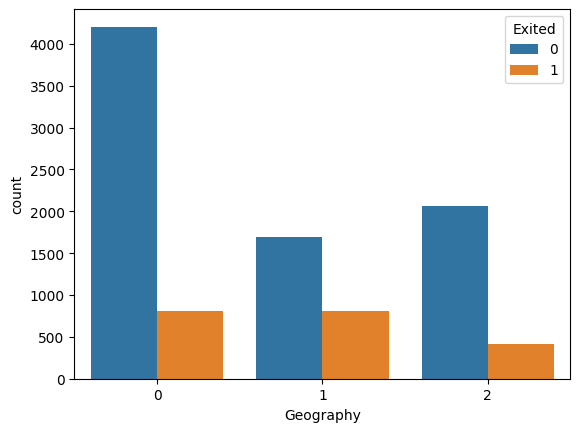

In [ ]:
sns.countplot(x=df['Geography'],hue=df['Exited'])

<Axes: xlabel='Age', ylabel='Count'>

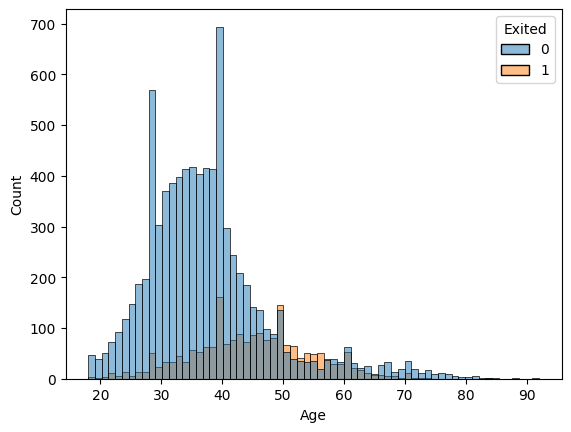

In [ ]:
sns.histplot(x=df['Age'],hue=df['Exited'])

<Axes: xlabel='CreditScore', ylabel='Count'>

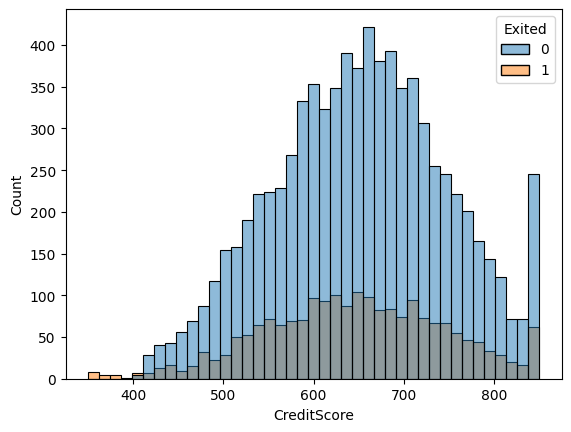

In [ ]:
sns.histplot(x=df['CreditScore'],hue=df['Exited'])

<BarContainer object of 10000 artists>

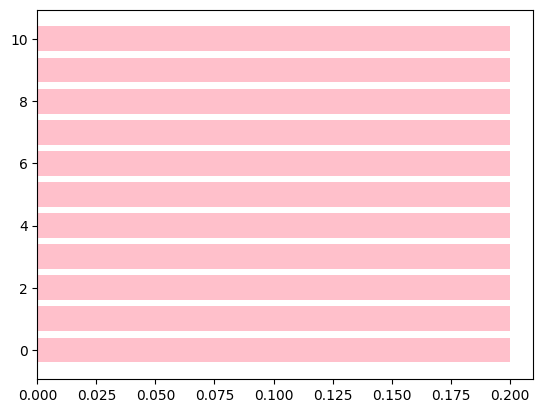

In [ ]:
plt.barh(df['Tenure'],width=0.2,color='pink')

<Axes: xlabel='Balance', ylabel='Count'>

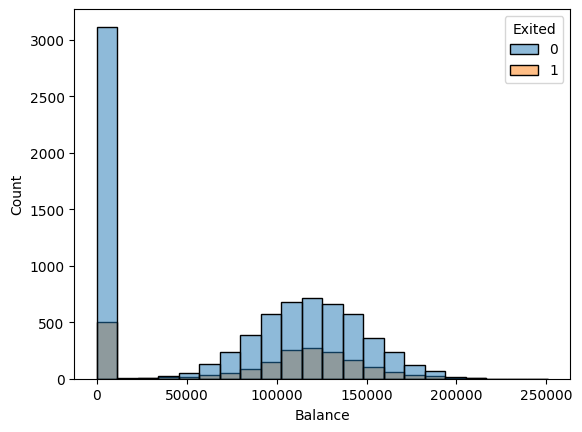

In [ ]:
sns.histplot(x=df['Balance'],hue=df['Exited'])

<Axes: xlabel='Balance'>

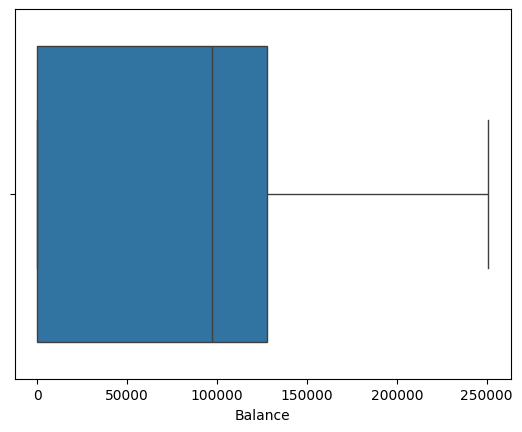

In [ ]:
sns.boxplot(x=df['Balance'])

/tmp/ipython-input-3542289925.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.countplot(x=df['NumOfProducts'],hue=df['Exited'],color='red')


<Axes: xlabel='NumOfProducts', ylabel='count'>

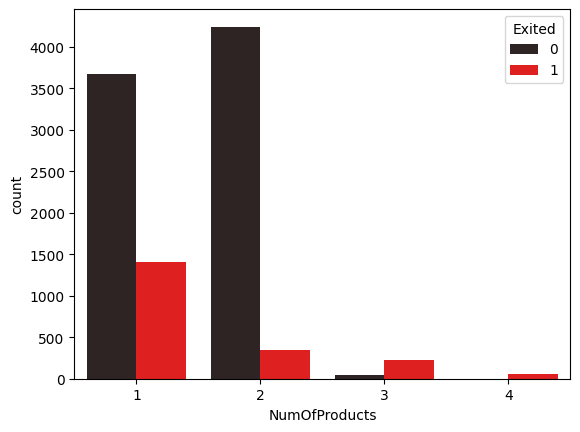

In [ ]:
sns.countplot(x=df['NumOfProducts'],hue=df['Exited'],color='red')

/tmp/ipython-input-2994226764.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  sns.boxplot(x=df['HasCrCard'],hue=df['Exited'],color='green')


<Axes: xlabel='HasCrCard'>

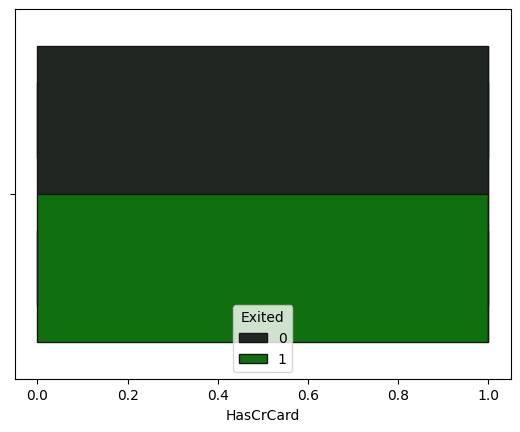

In [ ]:
sns.boxplot(x=df['HasCrCard'],hue=df['Exited'],color='green')

/tmp/ipython-input-286193543.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(x=df['IsActiveMember'],hue=df['Exited'],color='blue')


<Axes: xlabel='IsActiveMember', ylabel='count'>

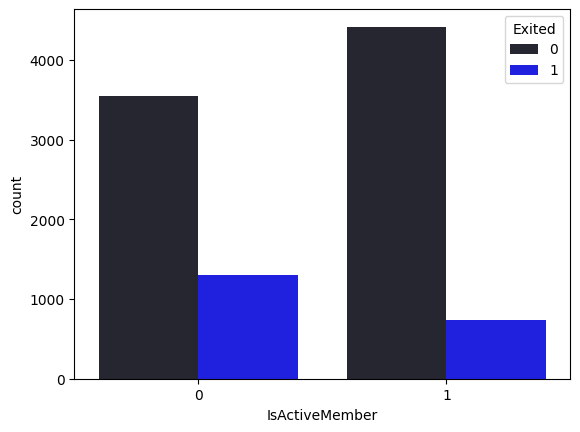

In [ ]:
sns.countplot(x=df['IsActiveMember'],hue=df['Exited'],color='blue')

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

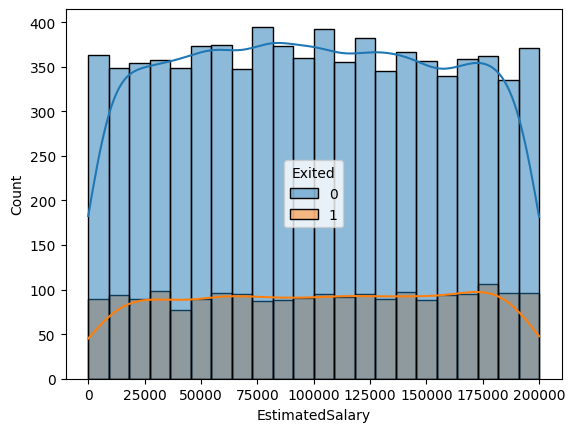

In [ ]:
sns.histplot(x=df['EstimatedSalary'],color='orange',kde=True,hue=df['Exited'])

<Axes: xlabel='EstimatedSalary'>

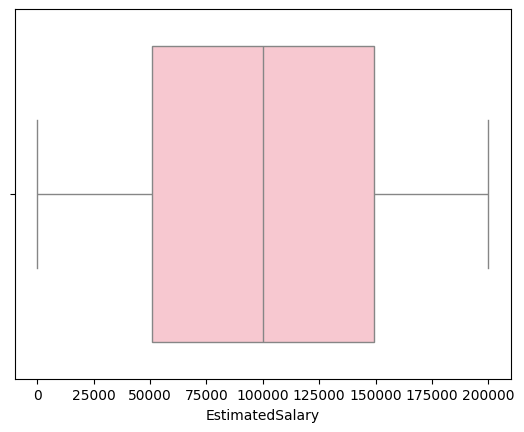

In [ ]:
sns.boxplot(x=df['EstimatedSalary'],color='pink')

<Axes: xlabel='Age', ylabel='Gender'>

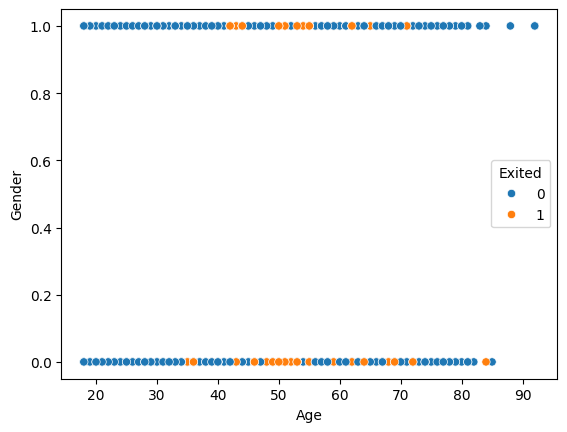

In [ ]:
sns.scatterplot(x=df['Age'],y=df['Gender'],hue=df['Exited'])

<Axes: xlabel='Age', ylabel='Balance'>

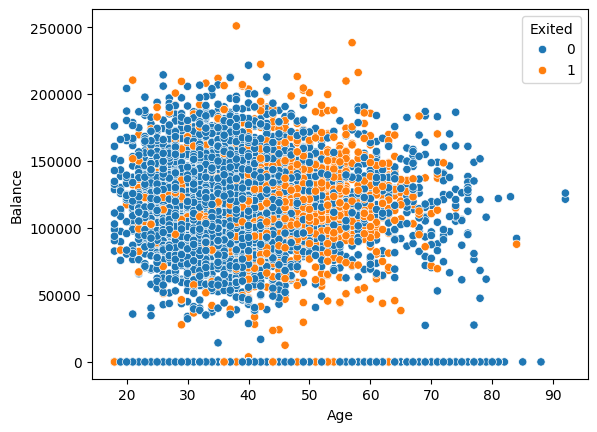

In [ ]:
sns.scatterplot(x=df['Age'],y=df['Balance'],hue=df['Exited'])

<Axes: xlabel='Age', ylabel='CreditScore'>

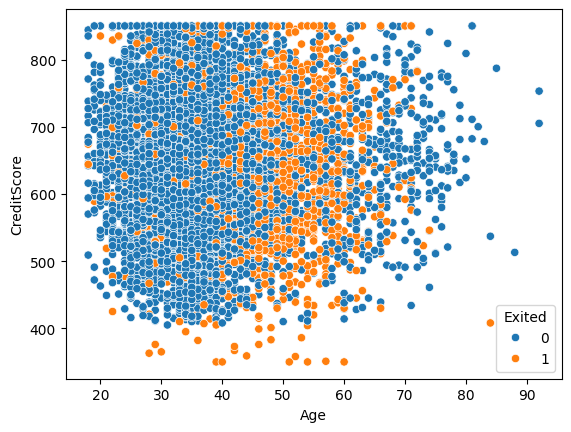

In [ ]:
sns.scatterplot(x=df['Age'],y=df['CreditScore'],hue=df['Exited'])

<Axes: xlabel='EstimatedSalary', ylabel='Balance'>

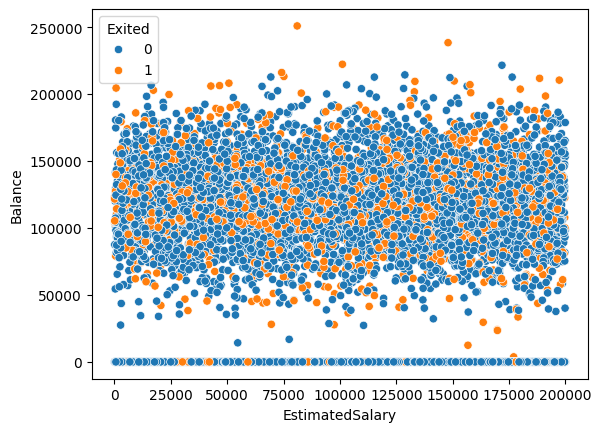

In [ ]:
sns.scatterplot(x=df['EstimatedSalary'],y=df['Balance'],hue=df['Exited'])

<Axes: >

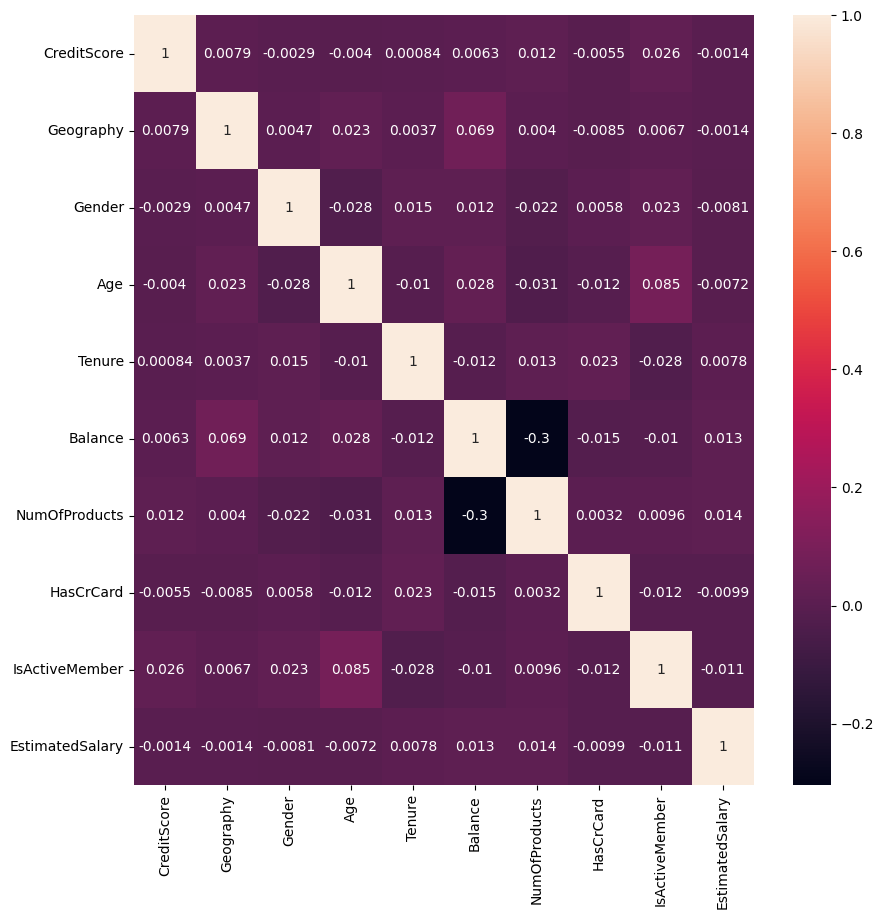

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(x.corr(),annot=True)

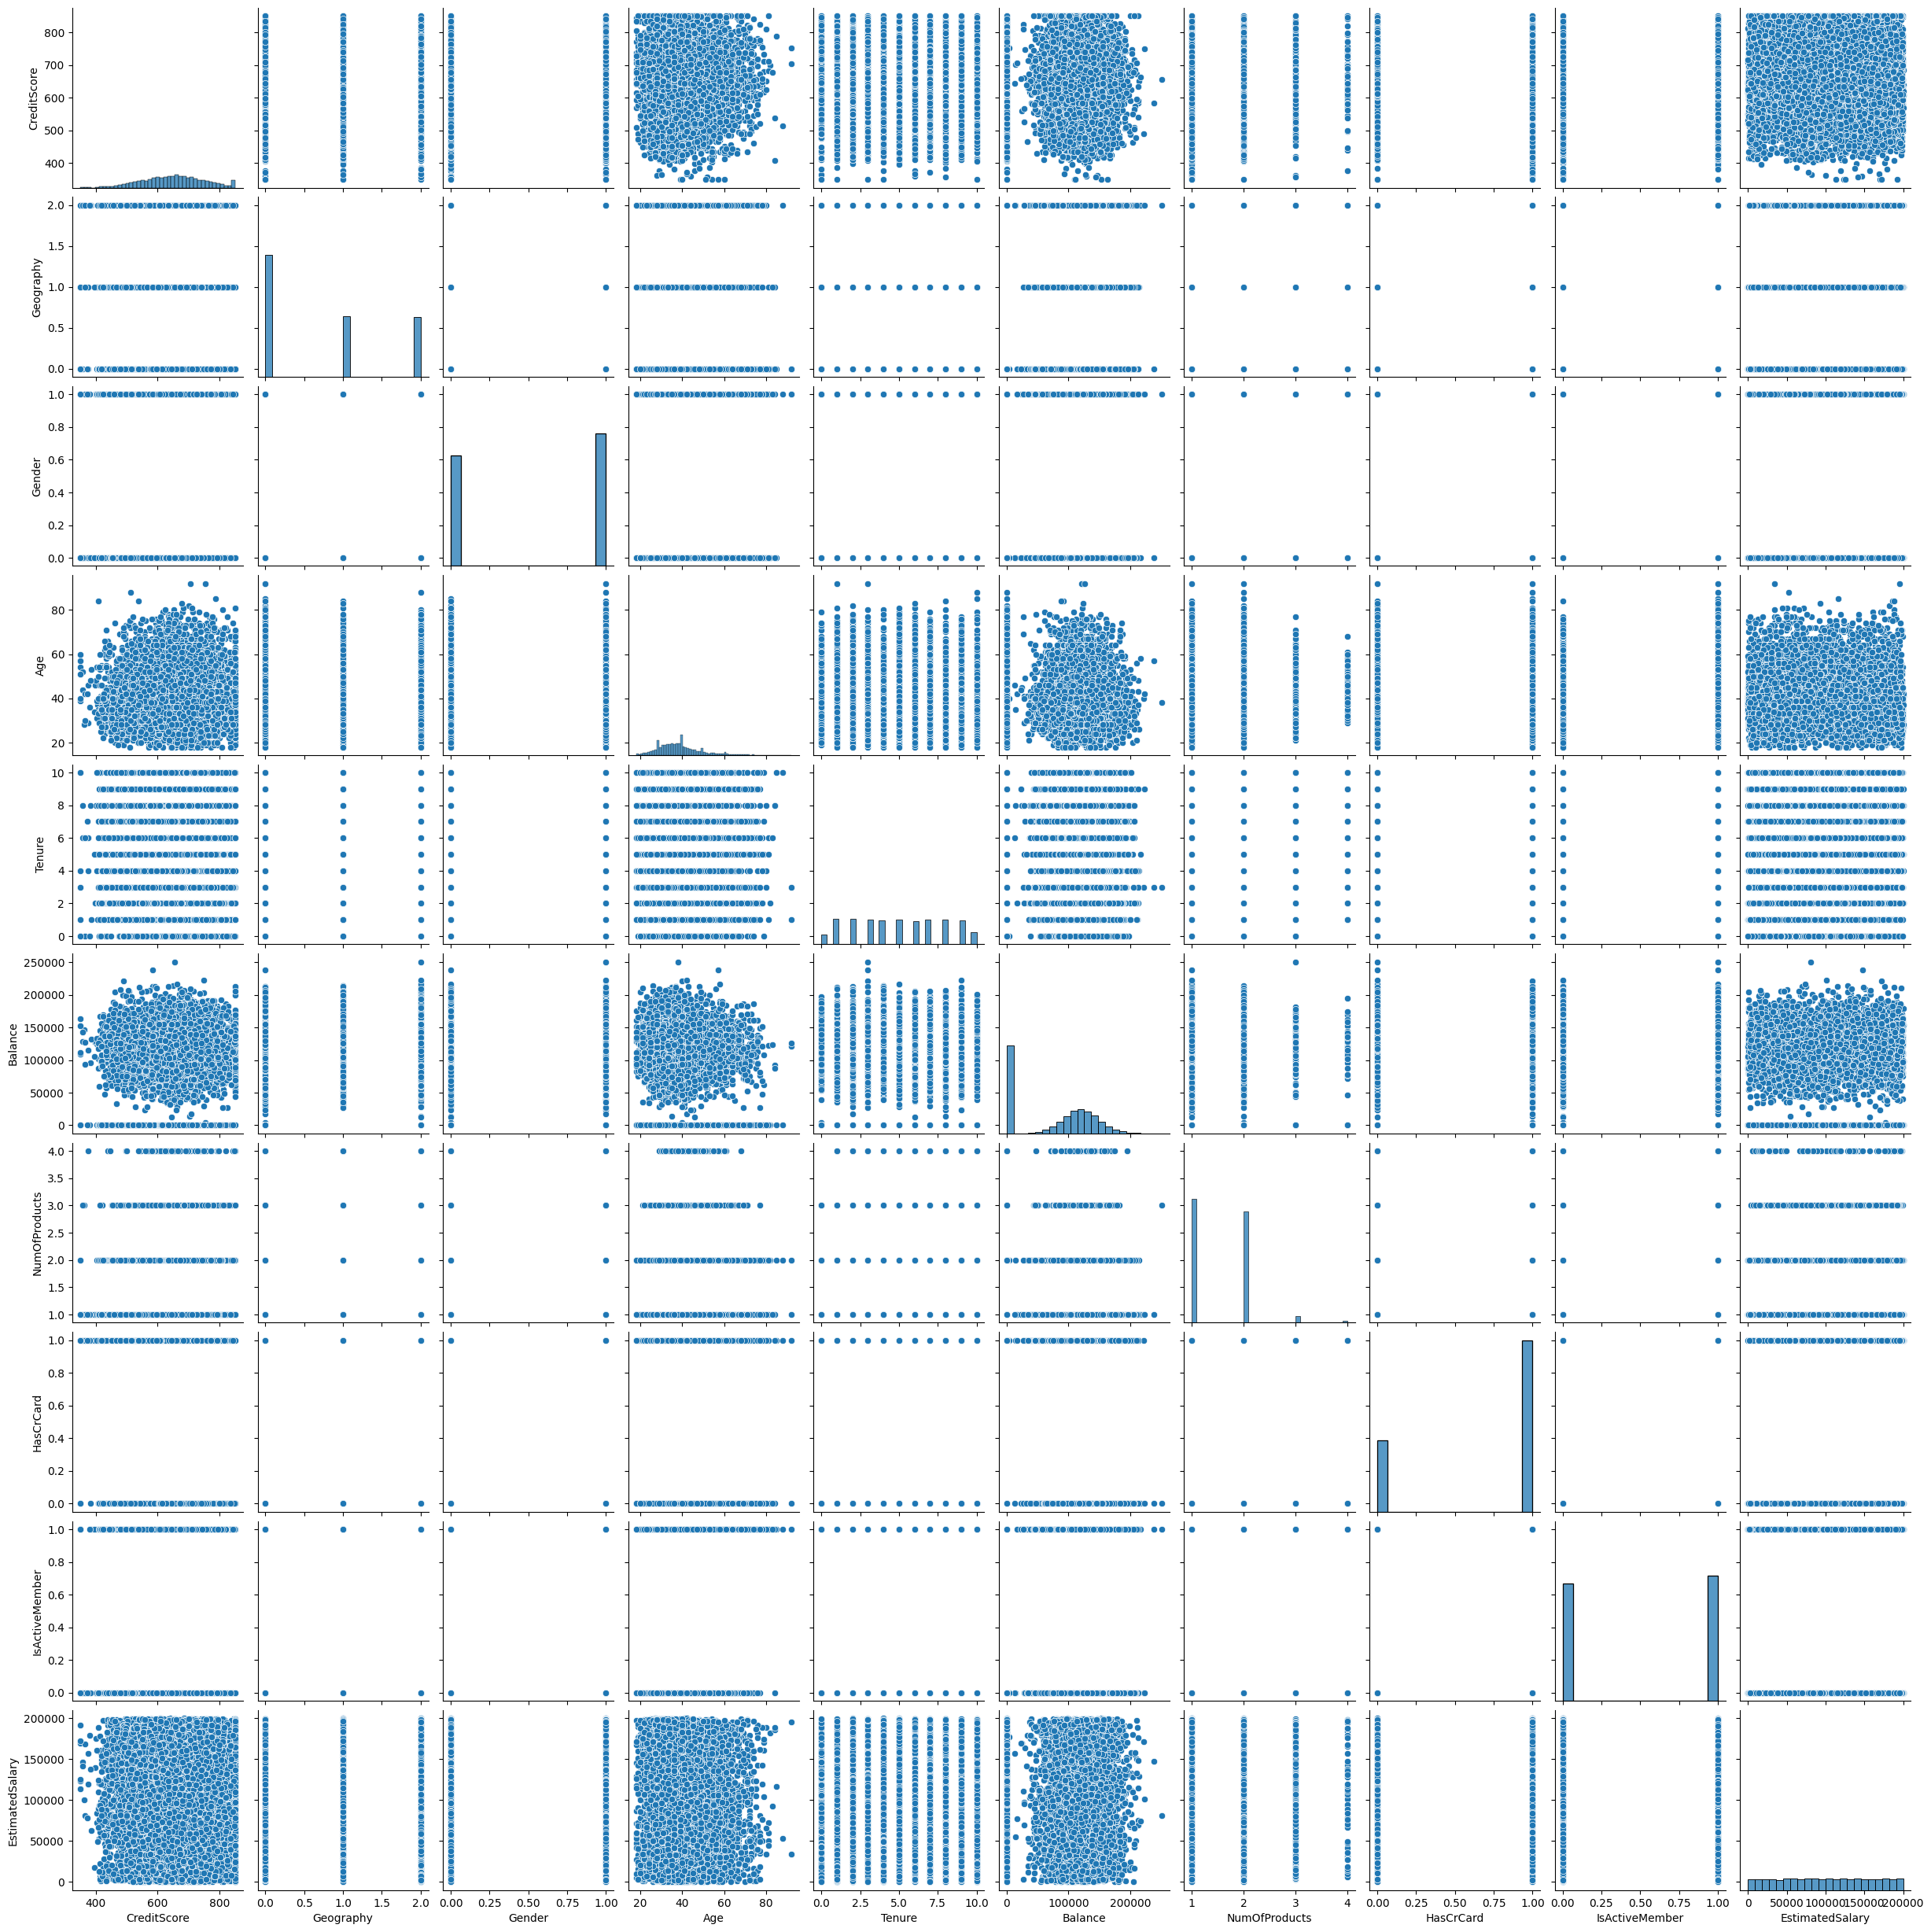

In [ ]:
sns.pairplot(x)

In [ ]:
# train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
#scaling
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [ ]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


Model Building

In [ ]:
#creating sequential model
ann=tf.keras.models.Sequential()
ann

<Sequential name=sequential, built=False>

In [ ]:
#Adding input,hidden and output layer
#1 input layer -- 6 neurons
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
#2 hidden layer -- 8 neurons
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
#3 output layer -- 1 neuron
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

Model Compiling

In [ ]:
ann.compile(optimizer='Adam',loss=['BinaryCrossentropy'],metrics=['accuracy'])

Model Training

In [ ]:
ann_model=ann.fit(x_train,y_train,batch_size=32,epochs=100)
ann_model

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5329 - loss: 0.7636
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8100 - loss: 0.4620
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8025 - loss: 0.4513
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8148 - loss: 0.4273
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8060 - loss: 0.4410
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8196 - loss: 0.4181
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8152 - loss: 0.4303
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8226 - loss: 0.4163
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8192 - loss: 0.4157
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8222 - loss: 0.4194
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8291 - loss: 0.4133
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
type(ann_model)

keras.src.callbacks.history.History

In [ ]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (32, 6)                │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 8)                │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 1)                │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 395 (1.55 KB)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 264 (1.04 KB)

In [ ]:
ann_model.history

{'accuracy': [0.6638749837875366,
  0.800000011920929,
  0.8066250085830688,
  0.8109999895095825,
  0.815500020980835,
  0.8162500262260437,
  0.8190000057220459,
  0.8201249837875366,
  0.8228750228881836,
  0.824999988079071,
  0.8256250023841858,
  0.8263750076293945,
  0.8302500247955322,
  0.8322499990463257,
  0.8326249718666077,
  0.8323749899864197,
  0.8328750133514404,
  0.8333749771118164,
  0.8338750004768372,
  0.8351250290870667,
  0.8348749876022339,
  0.8360000252723694,
  0.8362500071525574,
  0.8360000252723694,
  0.8360000252723694,
  0.8368750214576721,
  0.8362500071525574,
  0.8370000123977661,
  0.8381249904632568,
  0.8361250162124634,
  0.8381249904632568,
  0.8387500047683716,
  0.8376250267028809,
  0.8374999761581421,
  0.8385000228881836,
  0.8383749723434448,
  0.8385000228881836,
  0.8379999995231628,
  0.8388749957084656,
  0.8379999995231628,
  0.8389999866485596,
  0.8391249775886536,
  0.8381249904632568,
  0.8387500047683716,
  0.8385000228881836,
 

In [ ]:
keys=ann_model.history.keys()
keys

dict_keys(['accuracy', 'loss'])

In [ ]:
sns.lineplot(x=ann_model.epoch,y=ann_model.history['accuracy'],color='green')

In [ ]:
sns.lineplot(x=ann_model.epoch,y=ann_model.history['loss'],color='red')

In [ ]:
yp=ann.predict(x_test)
yp

In [ ]:
yp_class_list=[]
for i in yp:
  if i>0.5:
    yp_class_list.append(1)
  else:
    yp_class_list.append(0)
yp_class_list